In [51]:
import pandas as pd

In [52]:
articlesdf = pd.read_csv("CNN_Articles.csv")

In [53]:
articlesdf.head()

,Unnamed: 0,author,date_published,part_of,article_section,url,headline,description,keywords,alternative_headline,text
0,0,"Jacopo Prisco, CNN",2021-07-15T02:46:59Z,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,1,"Jacopo Prisco, CNN",2021-07-15T02:46:59Z,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
2,2,"Stephanie Bailey, CNN",2021-05-12T07:52:09Z,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
3,3,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16T02:51:30Z,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
4,4,"Paul R. La Monica, CNN Business",2022-03-15T09:57:36Z,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...",Russia is no longer an option for investors. T...,"New York (CNN Business)For many years, the wor..."


In [54]:
articlesdf.columns

Index(['Unnamed: 0', 'author', 'date_published', 'part_of', 'article_section',
       'url', 'headline', 'description', 'keywords', 'alternative_headline',
       'text'],
      dtype='object')

In [55]:
articlesdf.shape

(9308, 11)

In [56]:
articlesdf['article_section'].value_counts()

sport             2326
europe            1614
football          1281
uk                 756
us                 487
tennis             401
golf               390
entertainment      236
motorsport         230
australia          228
politics           214
health             188
opinions           158
world              157
africa             134
business            86
perspectives        64
weather             62
tech                52
investing           45
asia                33
success             32
living              24
economy             23
china               14
homes               14
americas            10
middleeast          10
energy               9
media                6
india                4
intl_world           4
business-money       4
movies               4
business-food        3
cars                 3
celebrities          2
Name: article_section, dtype: int64

In [57]:
list(articlesdf.columns)

['Unnamed: 0',
 'author',
 'date_published',
 'part_of',
 'article_section',
 'url',
 'headline',
 'description',
 'keywords',
 'alternative_headline',
 'text']

In [58]:
articlesdf = articlesdf.drop(['Unnamed: 0'],axis = 1)

In [59]:
articlesdf.isna().sum()

author                  0
date_published          0
part_of                 0
article_section         0
url                     0
headline                0
description             0
keywords                0
alternative_headline    0
text                    0
dtype: int64

In [60]:
articlesdf.drop_duplicates(keep='first', inplace=True)

In [61]:
articlesdf.shape

(4081, 10)

In [62]:
articlesdf['headline'][0]

"There's a shortage of truckers, but TuSimple thinks it has a solution: no driver needed - CNN"

In [63]:
articlesdf['alternative_headline'][0]

"There's a shortage of truckers, but TuSimple thinks it has a solution: no driver needed"

In [64]:
articlesdf['description'][0]

'The e-commerce boom has exacerbated a global truck driver shortage, but could autonomous trucks help fix the problem?'

In [65]:
articlesdf['text'][0][:100]

" (CNN)Right now, there's a shortage of truck drivers in the US and worldwide, exacerbated by the e-c"

In [66]:
(articlesdf['headline'] + ' ' + articlesdf['alternative_headline'])[0]

"There's a shortage of truckers, but TuSimple thinks it has a solution: no driver needed - CNN There's a shortage of truckers, but TuSimple thinks it has a solution: no driver needed"

In [67]:
articlesdf['merged_text'] = articlesdf['headline'] + ' ' + articlesdf['description'] + ' ' + articlesdf['text']

In [68]:
articlesdf['merged_text']

0       There's a shortage of truckers, but TuSimple t...
2       Bioservo's robotic 'Ironhand' could protect fa...
3       This swarm of robots gets smarter the more it ...
4       Russia is no longer an option for investors. T...
7       Russian energy investment ban part of new EU s...
                              ...                        
4729    Tiger Woods: Is this the end of his era? - CNN...
8086    Kenya's UN ambassador slams Russia and compare...
8185    Anti-war protester interrupts live Russian sta...
8410    Kyrie Irving: NBA fines Brooklyn Nets $50,000 ...
8413    Messi and Neymar booed by PSG fans after anoth...
Name: merged_text, Length: 4081, dtype: object

In [69]:
# import nltk
# import ssl

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

# nltk.download()

In [70]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [71]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [72]:
import re
regexp = re.compile('[-~`!@#$%^&*()_=+\[\]{}\\|;:\'\",.<>/?]+')


In [73]:
articlesdf['merged_text'] = articlesdf['merged_text'].apply(lambda x: ' '.join([word for word in x.split() if (word.lower() not in (stop) and not(re.search(regexp, word)))]))


In [74]:
articlesdf.columns

Index(['author', 'date_published', 'part_of', 'article_section', 'url',
       'headline', 'description', 'keywords', 'alternative_headline', 'text',
       'merged_text'],
      dtype='object')

In [75]:
articlesdf['merged_text'] = articlesdf['merged_text'].apply(lambda x: ' '.join([word for word in x.split() if word.isalpha() and len(word)>2]))


In [76]:
import nltk
# nltk.download('punkt')
articlesdf['tokens'] = articlesdf.apply(lambda row: nltk.word_tokenize(row['merged_text']), axis=1)

In [77]:
articlesdf['tokens']

0       [shortage, TuSimple, thinks, driver, needed, C...
2       [robotic, could, protect, factory, workers, in...
3       [swarm, robots, gets, smarter, works, CNN, Hon...
4       [Russia, longer, option, emerging, markets, CN...
7       [Russian, energy, investment, ban, part, new, ...
                              ...                        
4729    [Tiger, end, CNN, Tiger, Woods, rarest, transc...
8086    [ambassador, slams, Russia, compares, Ukraine,...
8185    [protester, interrupts, live, Russian, state, ...
8410    [Kyrie, NBA, fines, Brooklyn, Nets, allowing, ...
8413    [Messi, Neymar, booed, PSG, fans, another, Cha...
Name: tokens, Length: 4081, dtype: object

In [78]:
articlesdf.columns

Index(['author', 'date_published', 'part_of', 'article_section', 'url',
       'headline', 'description', 'keywords', 'alternative_headline', 'text',
       'merged_text', 'tokens'],
      dtype='object')

In [79]:
articlesdf = articlesdf.drop(['merged_text'],axis = 1)

In [80]:
articlesdf

,author,date_published,part_of,article_section,url,headline,description,keywords,alternative_headline,text,tokens
0,"Jacopo Prisco, CNN",2021-07-15T02:46:59Z,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d...","[shortage, TuSimple, thinks, driver, needed, C..."
2,"Stephanie Bailey, CNN",2021-05-12T07:52:09Z,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...,"[robotic, could, protect, factory, workers, in..."
3,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16T02:51:30Z,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut...","[swarm, robots, gets, smarter, works, CNN, Hon..."
4,"Paul R. La Monica, CNN Business",2022-03-15T09:57:36Z,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...",Russia is no longer an option for investors. T...,"New York (CNN Business)For many years, the wor...","[Russia, longer, option, emerging, markets, CN..."
7,Reuters,2022-03-15T11:27:02Z,business,business,https://www.cnn.com/2022/03/15/business/russia...,Russian energy investment ban part of new EU s...,The European Union formally approved on Tuesda...,"business, Russian energy investment ban part o...",EU bans investment in Russian energy in new sa...,The European Union formally approved on Tuesda...,"[Russian, energy, investment, ban, part, new, ..."
...,...,...,...,...,...,...,...,...,...,...,...
4729,"Analysis by Stephen Collinson, CNN",2021-12-01T14:32:33Z,sport,golf,https://www.cnn.com/2021/12/01/golf/tiger-wood...,Tiger Woods: Is this the end of his era? - CNN,Tiger Woods is the rarest of athletes. At his ...,"golf, Tiger Woods: Is this the end of his era?...",Is this the end of the Tiger Woods era?,This story was excerpted from the November 23 ...,"[Tiger, end, CNN, Tiger, Woods, rarest, transc..."
8086,"Amy Woodyatt, CNN",2022-02-23T15:43:55Z,news,europe,https://www.cnn.com/2022/02/23/europe/kenya-uk...,Kenya's UN ambassador slams Russia and compare...,Russia's recognition of two pro-Russian breaka...,"europe, Kenya's UN ambassador slams Russia and...",Kenya's UN ambassador slams Russia and compare...,(CNN)Russia's recognition of two pro-Russian ...,"[ambassador, slams, Russia, compares, Ukraine,..."
8185,"Paul P. Murphy, CNN",2022-03-15T05:57:31Z,business,media,https://www.cnn.com/2022/03/15/europe/ukraine-...,Anti-war protester interrupts live Russian sta...,In a bold protest against the invasion of Ukra...,"media, Anti-war protester interrupts live Russ...",Journalist interrupts live Russian state news ...,(CNN Business)In a bold protest against the i...,"[protester, interrupts, live, Russian, state, ..."
8410,CNN Sport staff,2022-03-15T09:47:14Z,sport,sport,https://www.cnn.com/2022/03/15/sport/brooklyn-...,"Kyrie Irving: NBA fines Brooklyn Nets $50,000 ...",The NBA has fined the Brooklyn Nets organizati...,"sport, Kyrie Irving: NBA fines Brooklyn Nets $...","Kyrie Irving: NBA fines Brooklyn Nets $50,000 ...",(CNN)The NBA has fined the Brooklyn Nets orga...,"[Kyrie, NBA, fines, Brooklyn, Nets, allowing, ..."


In [81]:
from nltk.stem import PorterStemmer
porter=PorterStemmer()

In [82]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [83]:

def stemming_text(token_list):
    return [porter.stem(word) for word in token_list]

In [84]:
def lemmatize_text(token_list):
    return [wordnet_lemmatizer.lemmatize(word) for word in token_list]


In [85]:
articlesdf['tokens'] = articlesdf.tokens.apply(stemming_text)

In [86]:
articlesdf['tokens'] = articlesdf.tokens.apply(lemmatize_text)

In [87]:
wordfrequency = {word:articlesdf['tokens'][0].count(word) for word in set(articlesdf['tokens'][0])}


In [88]:
type(wordfrequency)

dict

In [89]:
wordfrequency = dict(sorted(wordfrequency.items(), key=lambda item: item[1], reverse = True))

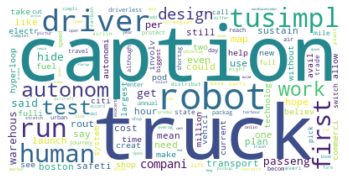

In [90]:
d = {}
for a, x in wordfrequency.items():
    d[a] = x

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(collocations= True,
                          background_color="white",)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [91]:
wordfrequency1 = {word:articlesdf['tokens'][12].count(word) for word in set(articlesdf['tokens'][12])}


In [92]:
wordfrequency1 = dict(sorted(wordfrequency1.items(), key=lambda item: item[1], reverse = True))

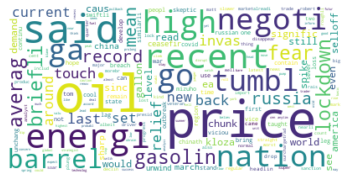

In [93]:
d = {}
for a, x in wordfrequency1.items():
    d[a] = x

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(collocations= True,
                          background_color="white",)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [94]:
frequencies = [item * 3 for item in list(wordfrequency.values())]


In [95]:
N = len(frequencies)

In [96]:
import random
random.seed(111)

In [97]:
import plotly.graph_objects as go
import random
import numpy as np

fig = go.Figure(data=[go.Scatter(
    x=np.random.normal(10, 10, N), y=np.random.normal(5, 5, N),
    text=list(wordfrequency.keys()),
    mode='markers',
    marker=dict(
        color=np.random.rand(N),
        size=frequencies,
    )
)])

fig.show()

In [98]:
tokens = list(articlesdf['tokens'])

In [99]:
tokens[0]

['shortag',
 'tusimpl',
 'think',
 'driver',
 'need',
 'cnn',
 'boom',
 'exacerb',
 'global',
 'truck',
 'driver',
 'could',
 'autonom',
 'truck',
 'help',
 'fix',
 'shortag',
 'truck',
 'driver',
 'exacerb',
 'boom',
 'brought',
 'one',
 'solut',
 'problem',
 'autonom',
 'sever',
 'compani',
 'race',
 'first',
 'launch',
 'among',
 'san',
 'tusimpl',
 'complet',
 'million',
 'mile',
 'road',
 'test',
 'prototyp',
 'truck',
 'across',
 'china',
 'although',
 'simpli',
 'commerci',
 'avail',
 'truck',
 'retrofit',
 'tusimpl',
 'deal',
 'place',
 'two',
 'largest',
 'truck',
 'manufactur',
 'navistar',
 'truck',
 'europ',
 'design',
 'build',
 'fulli',
 'autonom',
 'hope',
 'launch',
 'yara',
 'birkeland',
 'builder',
 'call',
 'first',
 'autonom',
 'cargo',
 'ship',
 'schedul',
 'make',
 'first',
 'journey',
 'two',
 'norwegian',
 'town',
 'end',
 'click',
 'see',
 'form',
 'transport',
 'set',
 'transform',
 'caption',
 'pictur',
 'oceanbird',
 'transatlant',
 'car',
 'carrier',
 'cut'

In [100]:
import fasttext.util
import fasttext
# fasttext.util.download_model('en', if_exists='ignore')

In [101]:
ft = fasttext.load_model('cc.en.300.bin')
ft.get_dimension()

300

In [102]:
docvectors = []
for eachdoc in articlesdf['tokens']:
    wordvectors = []
    for eachword in eachdoc:
        wordvectors.append(list(ft.get_word_vector(eachword)))
    documentvector = list(np.mean(wordvectors, axis = 0))
    docvectors.append(documentvector)
articlesdf["documentvector"] = docvectors

In [103]:
type(list(articlesdf["documentvector"]))

list

In [104]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=3, algorithm='auto',metric='cosine')
knn.fit(list(articlesdf["documentvector"]))

def get_neighbors(url):
    vector = articlesdf.loc[articlesdf['url'] == url, 'documentvector'].iloc[0]
    return knn.kneighbors([vector], 10, return_distance=True)

In [109]:
articlesdf['url'].values[:15]

array(['https://www.cnn.com/2021/07/14/world/tusimple-autonomous-truck-spc-intl/index.html',
       'https://www.cnn.com/2021/05/12/world/ironhand-exoskeleton-glove-spc-intl/index.html',
       'https://www.cnn.com/2021/06/15/asia/swarm-robots-hong-kong-warehouse-hnk-spc-intl/index.html',
       'https://www.cnn.com/2022/03/15/investing/brics-emerging-markets-russia/index.html',
       'https://www.cnn.com/2022/03/15/business/russia-europe-sanctions-energy/index.html',
       'https://www.cnn.com/2022/03/15/europe/ukraine-protester-interrupts-russian-state-news-broadcast/index.html',
       'https://www.cnn.com/2022/03/14/media/fox-correspondent-ben-hall-ukraine/index.html',
       'https://www.cnn.com/2022/03/14/investing/russia-economy-default/index.html',
       'https://www.cnn.com/2022/03/14/energy/oil-prices/index.html',
       'https://www.cnn.com/2022/03/14/energy/india-russia-oil/index.html',
       'https://www.cnn.com/2022/03/15/investing/japan-crypto-exchanges-russia-sancti

In [122]:
url= 'https://www.cnn.com/2022/03/15/investing/brics-emerging-markets-russia/index.html'

In [133]:
distance, similarurls = get_neighbors(url)

In [131]:
distance

array([[0.        , 0.05876833, 0.0645951 , 0.07325178, 0.07527328,
        0.07633466, 0.07710814, 0.07791793, 0.07824898, 0.07905924]],
      dtype=float32)

In [132]:
urldistances = distance[0][1:]

In [134]:
urldistances

array([0.05876833, 0.0645951 , 0.07325178, 0.07527328, 0.07633466,
       0.07710814, 0.07791793, 0.07824898, 0.07905924], dtype=float32)

In [135]:
recommendedurls = similarurls[0][1:]

In [136]:
recommendedurls

array([ 159, 1654, 3617, 2945,    9, 1190,  134, 1438,   15])

In [141]:
url_dist_dict = {}
for i in range(len(recommendedurls)):
    url_dist_dict[articlesdf['url'].values[recommendedurls[i]]] = urldistances[i]

In [144]:
url= 'https://www.cnn.com/2022/03/15/investing/brics-emerging-markets-russia/index.html'

In [142]:
url_dist_dict

{'https://www.cnn.com/2022/03/03/economy/china-cant-help-russia-sanctions-fallout-intl-hnk/index.html': 0.058768332,
 'https://www.cnn.com/2021/04/07/uk/boris-johnson-has-a-china-problem-intl-gb-cmd/index.html': 0.0645951,
 'https://www.cnn.com/2021/11/16/europe/putin-eastern-europe-ukraine-belarus-poland-intl-cmd/index.html': 0.073251784,
 'https://www.cnn.com/2021/09/16/australia/australia-china-us-aukus-submarine-intl-hnk/index.html': 0.075273275,
 'https://www.cnn.com/2022/03/14/energy/india-russia-oil/index.html': 0.076334655,
 'https://www.cnn.com/2021/02/01/europe/eu-russia-problem-intl/index.html': 0.077108145,
 'https://www.cnn.com/2022/03/05/business/ukraine-war-hits-africa-lgs-cmd-intl/index.html': 0.07791793,
 'https://www.cnn.com/2021/03/02/europe/europe-vaccine-strategy-splinters-intl/index.html': 0.07824898,
 'https://www.cnn.com/2022/03/02/business/companies-pulling-back-russia-ukraine-war-intl-hnk/index.html': 0.07905924}

In [145]:
get_neighbors(url)[1][1:]

array([], shape=(0, 10), dtype=int64)

In [146]:
similarurls

array([[   3,  159, 1654, 3617, 2945,    9, 1190,  134, 1438,   15]])

In [147]:
articlesdf['url'][2035]

'https://www.cnn.com/2021/03/07/europe/switzerland-referendum-face-covering-intl/index.html'

In [148]:
articlesdf.columns

Index(['author', 'date_published', 'part_of', 'article_section', 'url',
       'headline', 'description', 'keywords', 'alternative_headline', 'text',
       'tokens', 'documentvector'],
      dtype='object')

In [149]:
import plotly.express as px

In [150]:
articlesdf = pd.read_csv('Embeddingdata.csv')

In [151]:
articlesdf['vectors'] = articlesdf['documentvector'].apply(lambda x: eval(x))

In [152]:
from tqdm import tqdm
vec_data = []
for i,r in tqdm(articlesdf.iterrows()):
    vec_data.append(np.array(r['vectors']))

4081it [00:00, 30727.20it/s]


In [153]:
token_vec = np.array(vec_data)

In [154]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
transformed_matrix = pca.fit_transform(token_vec)

In [155]:
articlesdf['url'][:10]

0    https://www.cnn.com/2021/07/14/world/tusimple-...
1    https://www.cnn.com/2021/05/12/world/ironhand-...
2    https://www.cnn.com/2021/06/15/asia/swarm-robo...
3    https://www.cnn.com/2022/03/15/investing/brics...
4    https://www.cnn.com/2022/03/15/business/russia...
5    https://www.cnn.com/2022/03/15/europe/ukraine-...
6    https://www.cnn.com/2022/03/14/media/fox-corre...
7    https://www.cnn.com/2022/03/14/investing/russi...
8    https://www.cnn.com/2022/03/14/energy/oil-pric...
9    https://www.cnn.com/2022/03/14/energy/india-ru...
Name: url, dtype: object

In [156]:
fig = px.scatter_3d(
    transformed_matrix, x=0, y=1, z=2, color=articlesdf['part_of'],
    title=f'Total Explained Variance: {round(pca.explained_variance_ratio_.sum(), 3)}',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [157]:
import matplotlib.pyplot as plt
%matplotlib inline

In [160]:
subsetresult = transformed_matrix[:100]

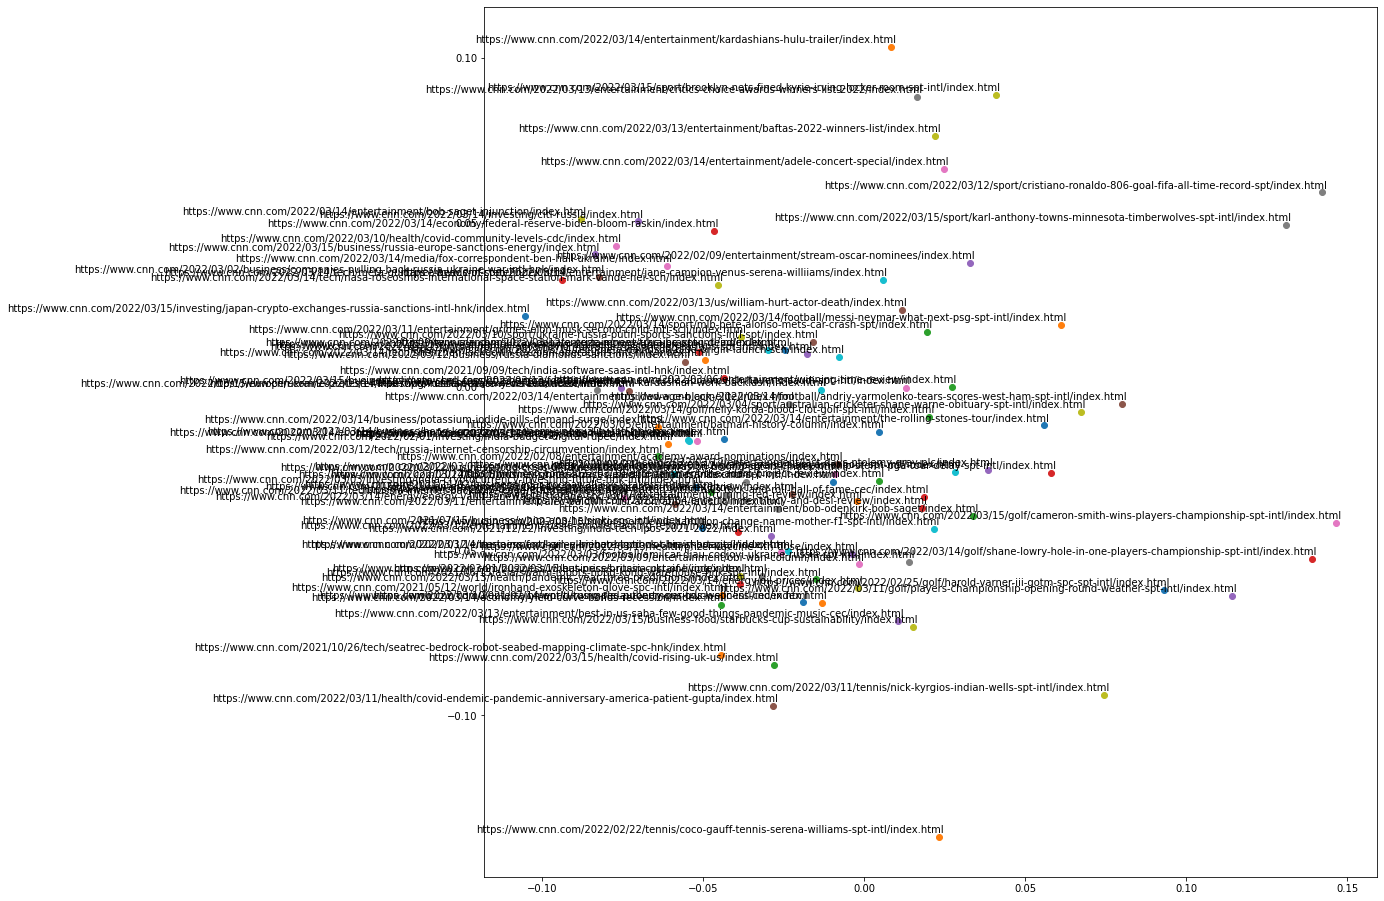

In [162]:
x = []
y = []
for value in subsetresult:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(articlesdf['url'].values[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()